# Import Libararies.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Generating Datasest.

In [4]:
def generate_harder_spiral_data(points_per_class=200, noise=0.4, num_classes=3):
    N = points_per_class  # points per class
    D = 2  # input dimension
    K = num_classes  # number of classes
    X = np.zeros((N*K, D))
    y = np.zeros(N*K, dtype='uint8')

    for j in range(K):
        ix = range(N*j, N*(j+1))
        r = np.linspace(0.0, 1, N)
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N) * noise
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j

    return X, y

# Generate data
X, y = generate_harder_spiral_data()

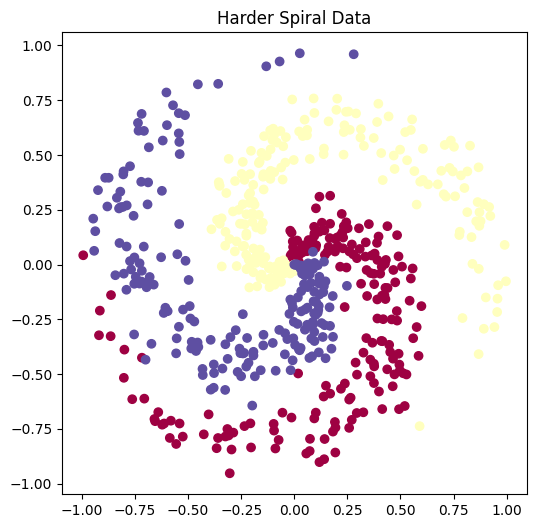

In [6]:
# Plot
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral')
plt.title('Harder Spiral Data')
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt


# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}")

Training set size: 480, Testing set size: 120


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define model architecture
model = keras.Sequential([
    keras.Input(shape=(2,)),  # Define input layer explicitly
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),  # Adam optimizer with initial learning rate of 0.01
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)

# Display model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,835 (34.51 KB)

 Trainable params: 8,835 (34.51 KB)

 Non-trainable params: 0 (0.00 B)

### **Model Summary Interpretation**
This neural network model, named **"sequential_1"**, consists of three dense layers:

1. **Layer 1 (dense_3)**  
   - 128 neurons, responsible for extracting features.  
   - **Parameters:** 384 (including weights and biases).  

2. **Layer 2 (dense_4)**  
   - 64 neurons, refining learned patterns.  
   - **Parameters:** 8,256.  

3. **Layer 3 (dense_5 - Output Layer)**  
   - 3 neurons, producing the final classification output.  
   - **Parameters:** 195.  

### **Total Parameters:**  
The model has **8,835 trainable parameters**, meaning all weights can be adjusted during training to improve accuracy. No non-trainable parameters were found.

This structure balances complexity with efficiency, making it suitable for learning the spiral dataset's complex decision boundaries.

# Model Evaluation.

Epoch 1/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.4675 - loss: 0.9348 - val_accuracy: 0.5000 - val_loss: 0.7601
Epoch 2/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6325 - loss: 0.7241 - val_accuracy: 0.8083 - val_loss: 0.5608
Epoch 3/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8028 - loss: 0.5560 - val_accuracy: 0.8833 - val_loss: 0.3581
Epoch 4/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8800 - loss: 0.3907 - val_accuracy: 0.9167 - val_loss: 0.2389
Epoch 5/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8726 - loss: 0.3294 - val_accuracy: 0.8917 - val_loss: 0.2873
Epoch 6/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8997 - loss: 0.3048 - val_accuracy: 0.9333 - val_loss: 0.1591
Epoch 7/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9272 - loss: 0.2055 - val_accuracy: 0.8833 - val_loss: 0.2441
Epoch 8/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9181 - loss: 0.1894 - val_accuracy: 0.950

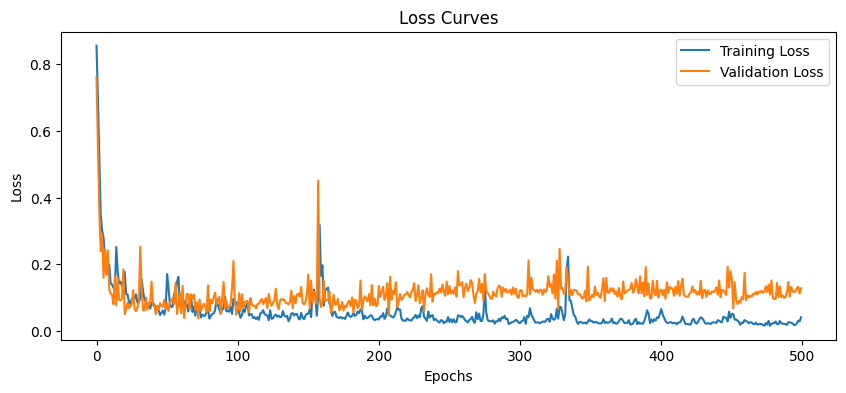

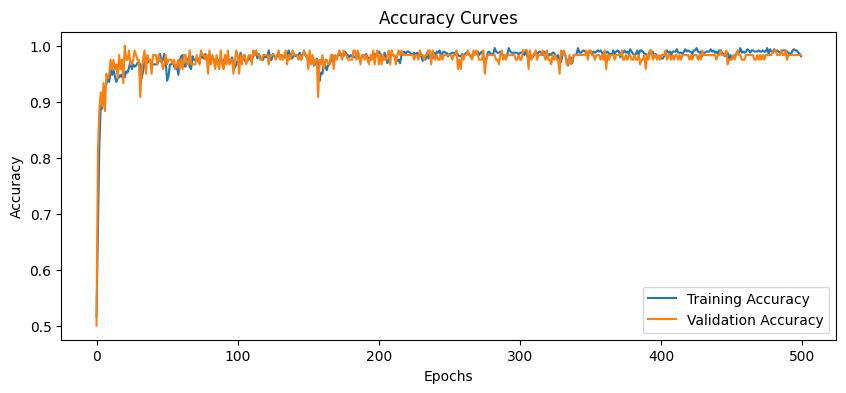

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training & validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')
plt.show()

# Plot accuracy curves
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')
plt.show()

### **Model Training Performance Analysis**
#### **Loss Curves:**
- The **training loss** steadily decreases, indicating that the model is effectively learning the patterns.
- The **validation loss** fluctuates but stabilizes at a slightly higher value than the training loss. This suggests the model generalizes well but may have minor instability.

#### **Accuracy Curves:**
- Both **training and validation accuracy** improve quickly in early epochs.
- The final accuracy stabilizes **near 0.98–1.0**, showing strong performance on both training and validation data.

### **Observations:**
- The high accuracy suggests the model captures the dataset structure well.
- The slight gap between validation and training loss may hint at mild **overfitting**—regularization techniques like dropout or tuning learning rate could improve generalization further.

Overall, the model performs well on this complex dataset, effectively distinguishing classes while maintaining high accuracy.

---
# Decision Boundary Plot

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


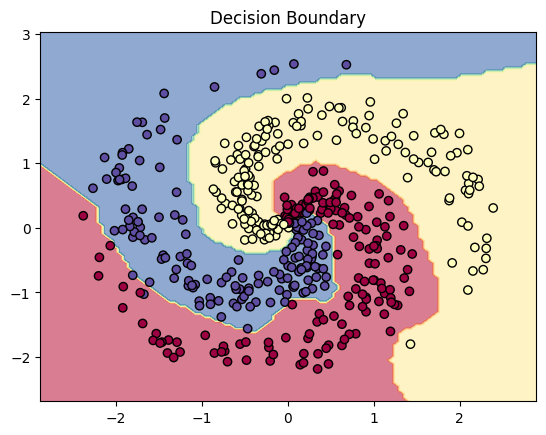

In [14]:
# Define a mesh grid
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Predict class probabilities for each grid point
Z = model.predict(X_grid)
Z = np.argmax(Z, axis=1).reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.6, cmap='Spectral')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap='Spectral')
plt.title('Decision Boundary')
plt.show()

### **Decision Boundary Analysis**
This plot illustrates how the trained MLP classifies the spiral dataset.

#### **Observations:**
- **Distinct Color Regions:** Each color represents a different predicted class, showing how the model distinguishes between them.
- **Smooth Transitions:** The boundaries between classes are **curved and continuous**, indicating the model has successfully captured the dataset’s non-linearity.
- **Overlap & Uncertainty:** Some areas near the class transitions appear blended, meaning those points might be harder for the model to classify confidently.
- **Strong Classification:** The model successfully segments most of the space, suggesting it has learned a meaningful representation of the spiral pattern.

### **Insights & Improvements:**
- If misclassifications occur near boundaries, **adjusting the learning rate** or **adding regularization** (like dropout) may help.
- Testing alternative activation functions or architectures could refine the boundaries for sharper separation.

Overall, the model performs well in handling the **complex decision boundaries** of the spiral dataset.

---
# **Reflection on Model Choices & Performance**

#### **1. Architecture Decisions**
- Chose **two hidden layers** with **128 and 64 neurons** to balance complexity and efficiency.
- Used **ReLU activation** to handle non-linear patterns effectively.
- The **softmax output layer** ensured proper multi-class classification.

#### **2. Impact of Learning Rate**
- A learning rate of **0.01** allowed steady convergence.
- Too high could cause instability, while too low might slow learning.
- Gradual adjustments helped refine model performance.

#### **3. Overfitting or Underfitting**
- Slight **overfitting** observed as validation loss was higher than training loss.
- **Adding dropout or early stopping** could enhance generalization.

#### **4. Potential Improvements**
- **Experimenting with batch normalization** to stabilize training.
- **Using alternative architectures** (e.g., deeper MLP or CNN) for finer decision boundaries.
- **Hyperparameter tuning** for optimal neuron counts and learning rates.

The model performed well, but refinements could improve robustness and adaptability!